While the default algorithms, along with `alg_hints = [:stiff]`, will suffice in most cases, there are times when you may need to exert more control. The purpose of this part of the tutorial is to introduce you to some of the most widely used algorithm choices and when they should be used. The corresponding page of the documentation is the [ODE Solvers](http://docs.juliadiffeq.org/latest/solvers/ode_solve.html) page which goes into more depth.

## Diagnosing Stiffness

One of the key things to know for algorithm choices is whether your problem is stiff. Let's take for example the driven Van Der Pol equation:
# Choosing an ODE Algorithm
### Chris Rackauckas

In [1]:
using DifferentialEquations, ParameterizedFunctions
van! = @ode_def VanDerPol begin
  dy = μ*((1-x^2)*y - x)
  dx = 1*y
end μ

prob = ODEProblem(van!,[0.0,2.0],(0.0,6.3),1e6)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 6.3)
u0: [0.0, 2.0]

One indicating factor that should alert you to the fact that this model may be stiff is the fact that the parameter is `1e6`: large parameters generally mean stiff models. If we try to solve this with the default method:

In [2]:
sol = solve(prob,Tsit5())

┌ Warning: Interrupted. Larger maxiters is needed.
└ @ DiffEqBase C:\Users\haixin\.julia\packages\DiffEqBase\ZQVwI\src\integrator_interface.jl:150


retcode: MaxIters
Interpolation: specialized 4th order "free" interpolation
t: 999978-element Array{Float64,1}:
 0.0                  
 4.997501249375313e-10
 5.4972513743128435e-9
 3.289910508569359e-8 
 9.055579963360815e-8 
 1.7309488667844897e-7
 2.793755093774501e-7 
 4.1495265736211405e-7
 5.807909425207012e-7 
 7.812799072271413e-7 
 1.0196772357137187e-6
 1.3021792208042476e-6
 1.6366005320003006e-6
 ⋮                    
 1.8458597597785131   
 1.8458612490746986   
 1.845862738373568    
 1.8458642276751214   
 1.8458657169793589   
 1.8458672062862802   
 1.8458686955958856   
 1.8458701849081751   
 1.8458716742231487   
 1.8458731635408063   
 1.845874652861148    
 1.8458761421841738   
u: 999978-element Array{Array{Float64,1},1}:
 [0.0, 2.0]          
 [-0.000998751, 2.0] 
 [-0.0109043, 2.0]   
 [-0.0626554, 2.0]   
 [-0.158595, 2.0]    
 [-0.270036, 2.0]    
 [-0.37832, 2.0]     
 [-0.474679, 2.0]    
 [-0.54993, 2.0]     
 [-0.602693, 2.0]    
 [-0.635376, 2.0]    
 [-

Here it shows that maximum iterations were reached. Another thing that can happen is that the solution can return that the solver was unstable (exploded to infinity) or that `dt` became too small. If these happen, the first thing to do is to check that your model is correct. It could very well be that you made an error that causes the model to be unstable!

If the model is the problem, then stiffness could be the reason. We can thus hint to the solver to use an appropriate method:

In [3]:
sol = solve(prob,alg_hints = [:stiff])

retcode: Success
Interpolation: specialized 3rd order "free" stiffness-aware interpolation
t: 698-element Array{Float64,1}:
 0.0                  
 4.997501249375313e-10
 5.454146363961655e-9 
 1.895430203585047e-8 
 4.1496576804042804e-8
 7.308070493248608e-8 
 1.1714620297820683e-7
 1.7481247411127233e-7
 2.4862286700158605e-7
 3.402538577740189e-7 
 4.521083086401378e-7 
 5.866767941841815e-7 
 7.473630587755621e-7 
 ⋮                    
 5.651126233169879    
 5.658531251124894    
 5.690136391934135    
 5.7398178602086185   
 5.799476609476999    
 5.872749556131411    
 5.953775882573488    
 6.040228149554932    
 6.12689077908994     
 6.213553408624947    
 6.28666936651838     
 6.3                  
u: 698-element Array{Array{Float64,1},1}:
 [0.0, 2.0]          
 [-0.000998751, 2.0] 
 [-0.0108195, 2.0]   
 [-0.0368509, 2.0]   
 [-0.0780351, 2.0]   
 [-0.131248, 2.0]    
 [-0.19755, 2.0]     
 [-0.272074, 2.0]    
 [-0.350452, 2.0]    
 [-0.426453, 2.0]    
 [-0.494929, 2.0

Or we can use the default algorithm. By default, DifferentialEquations.jl uses algorithms like `AutoTsit5(Rodas5())` which automatically detect stiffness and switch to an appropriate method once stiffness is known.

In [4]:
sol = solve(prob)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 1927-element Array{Float64,1}:
 0.0                  
 4.997501249375313e-10
 5.4972513743128435e-9
 3.289910508569359e-8 
 9.055579963360815e-8 
 1.7309488667844897e-7
 2.793755093774501e-7 
 4.1495265736211405e-7
 5.807909425207012e-7 
 7.812799072271413e-7 
 1.0196772357137187e-6
 1.3021792208042476e-6
 1.6366005320003006e-6
 ⋮                    
 6.1562575734988      
 6.172986931235588    
 6.1891214008184345   
 6.204647119147191    
 6.219555078801004    
 6.233840698784528    
 6.247503396702821    
 6.26054616845715     
 6.272975180407388    
 6.284799377914966    
 6.296030113262939    
 6.3                  
u: 1927-element Array{Array{Float64,1},1}:
 [0.0, 2.0]         
 [-0.000998751, 2.0]
 [-0.0109043, 2.0]  
 [-0.0626554, 2.0]  
 [-0.158595, 2.0]   
 [-0.270036, 2.0]   
 [-0.37832, 2.0]    
 [-0.474679, 2.0]   
 [-0.54993, 2.0]    
 [-0.602693, 2.0]   
 [-0.635376, 2.0]   
 [-0.653257, 2.0]   
 

Another way to understand stiffness is to look at the solution.

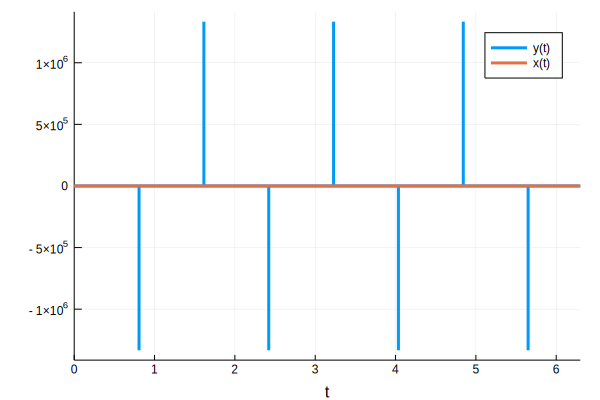

In [5]:
using Plots; gr()
sol = solve(prob,alg_hints = [:stiff],reltol=1e-6)
plot(sol,denseplot=false)

Let's zoom in on the y-axis to see what's going on:

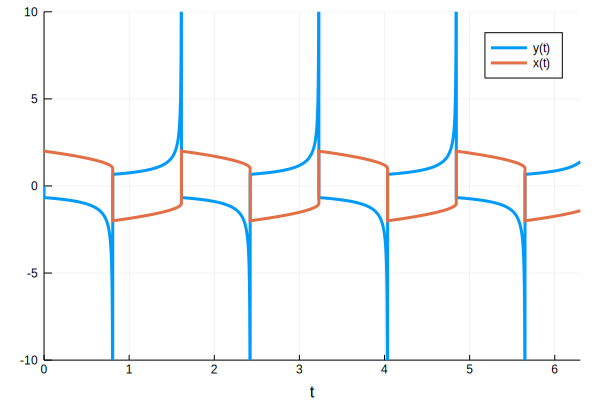

In [6]:
plot(sol,ylims = (-10.0,10.0))

Notice how there are some extreme vertical shifts that occur. These vertical shifts are places where the derivative term is very large, and this is indicative of stiffness. This is an extreme example to highlight the behavior, but this general idea can be carried over to your problem. When in doubt, simply try timing using both a stiff solver and a non-stiff solver and see which is more efficient.

To try this out, let's use BenchmarkTools, a package that let's us relatively reliably time code blocks.

In [7]:
function lorenz!(du,u,p,t)
    σ,ρ,β = p
    du[1] = σ*(u[2]-u[1])
    du[2] = u[1]*(ρ-u[3]) - u[2]
    du[3] = u[1]*u[2] - β*u[3]
end
u0 = [1.0,0.0,0.0]
p = (10,28,8/3)
tspan = (0.0,100.0)
prob = ODEProblem(lorenz!,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: [1.0, 0.0, 0.0]

And now, let's use the `@btime` macro from benchmark tools to compare the use of non-stiff and stiff solvers on this problem.

In [8]:
using BenchmarkTools
@btime solve(prob);

  798.000 μs (13053 allocations: 1.41 MiB)


In [9]:
@btime solve(prob,alg_hints = [:stiff]);

  4.787 ms (17261 allocations: 1.52 MiB)


In this particular case, we can see that non-stiff solvers get us to the solution much more quickly.

## The Recommended Methods

When picking a method, the general rules are as follows:

- Higher order is more efficient at lower tolerances, lower order is more efficient at higher tolerances
- Adaptivity is essential in most real-world scenarios
- Runge-Kutta methods do well with non-stiff equations, Rosenbrock methods do well with small stiff equations, BDF methods do well with large stiff equations

While there are always exceptions to the rule, those are good guiding principles. Based on those, a simple way to choose methods is:

- The default is `Tsit5()`, a non-stiff Runge-Kutta method of Order 5
- If you use low tolerances (`1e-8`), try `Vern7()` or `Vern9()`
- If you use high tolerances, try `BS3()`
- If the problem is stiff, try `Rosenbrock23()`, `Rodas5()`, or `CVODE_BDF()`
- If you don't know, use `AutoTsit5(Rosenbrock23())` or `AutoVern9(Rodas5())`.

(This is a simplified version of the default algorithm chooser)

## Comparison to other Software

If you are familiar with MATLAB, SciPy, or R's DESolve, here's a quick translation start to have transfer your knowledge over.

- `ode23` -> `BS3()`
- `ode45`/`dopri5` -> `DP5()`, though in most cases `Tsit5()` is more efficient
- `ode23s` -> `Rosenbrock23()`, though in most cases `Rodas4()` is more efficient
- `ode113` -> `VCABM()`, though in many cases `Vern7()` is more efficient
- `dop853` -> `DP8()`, though in most cases `Vern7()` is more efficient
- `ode15s`/`vode` -> `QNDF()`, though in many cases `CVODE_BDF()`, `Rodas4()`
  or `radau()` are more efficient
- `ode23t` -> `Trapezoid()` for efficiency and `GenericTrapezoid()` for robustness
- `ode23tb` -> `TRBDF2`
- `lsoda` -> `lsoda()` (requires `]add LSODA; using LSODA`)
- `ode15i` -> `IDA()`, though in many cases `Rodas4()` can handle the DAE and is
  significantly more efficient